<a href="https://colab.research.google.com/github/andryelarossignol/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
#define kernels to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [5]:
metrics = {kernel: {'accuracy': [], 'recall': [], 'precision': [], 'f1_score': []} for kernel in kernels}

In [8]:
for _ in range(30):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    for kernel in kernels:
        svm = SVC(kernel=kernel)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)


        metrics[kernel]['accuracy'].append(acc)
        metrics[kernel]['recall'].append(rec)
        metrics[kernel]['precision'].append(prec)
        metrics[kernel]['f1_score'].append(f1)

In [9]:

df_metrics = pd.DataFrame([
    {'Kernel': kernel, 'Accuracy': acc, 'Recall': rec, 'Precision': prec, 'F1-Score': f1}
    for kernel, results in metrics.items()
    for acc, rec, prec, f1 in zip(results['accuracy'], results['recall'], results['precision'], results['f1_score'])
])

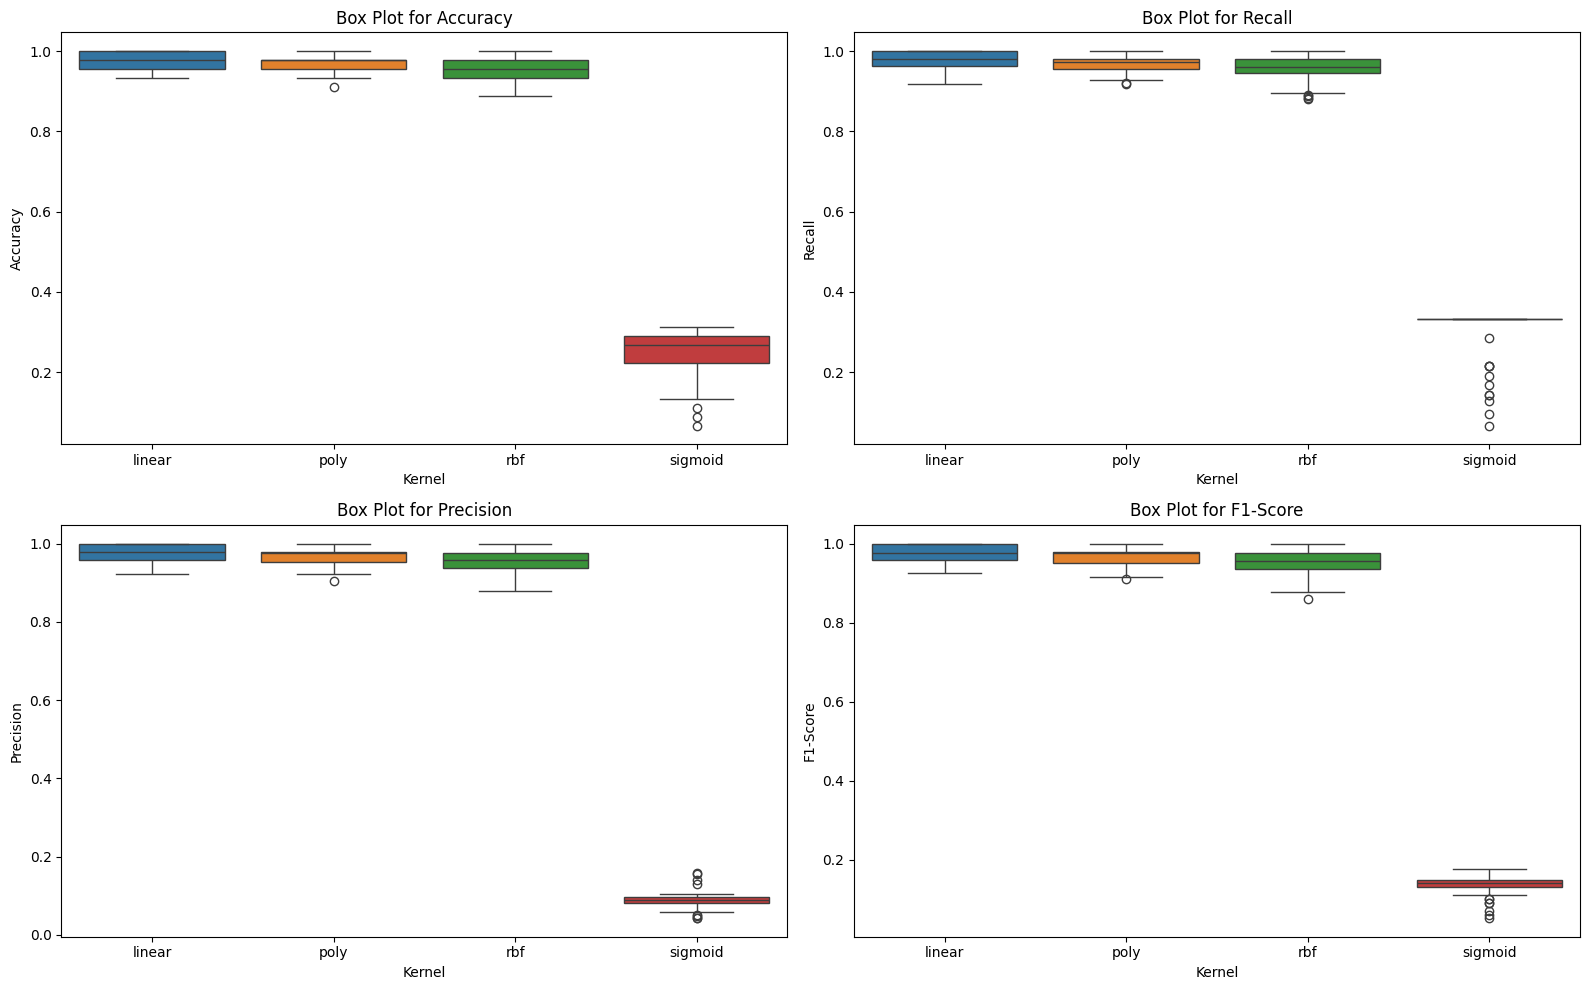

In [11]:
plt.figure(figsize=(16, 10))
for i, metric in enumerate(['Accuracy', 'Recall', 'Precision', 'F1-Score'], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_metrics, x='Kernel', y=metric, hue='Kernel', legend=False)  # Adicionado `hue='Kernel'` e `legend=False`
    plt.title(f'Box Plot for {metric}')
    plt.xlabel('Kernel')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()